In [30]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns',None)

import pandasql as psql

In [31]:
appdata= pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\AIML (1)\appdata10.csv",header=0)

appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,Unnamed: 12
0,235136,14:51.3,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0,NaN
1,333588,16:00.9,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0,NaN
2,254414,19:09.2,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1,NaN
3,234192,08:46.4,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,11:49.5,0,NaN
4,51549,50:48.7,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,56:37.8,1,NaN


In [32]:
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user                  50000 non-null  int64  
 1   first_open            50000 non-null  object 
 2   dayofweek             50000 non-null  int64  
 3   hour                  50000 non-null  object 
 4   age                   50000 non-null  int64  
 5   screen_list           50000 non-null  object 
 6   numscreens            50000 non-null  int64  
 7   minigame              50000 non-null  int64  
 8   used_premium_feature  50000 non-null  int64  
 9   enrolled              50000 non-null  int64  
 10  enrolled_date         31074 non-null  object 
 11  liked                 50000 non-null  int64  
 12  Unnamed: 12           0 non-null      float64
dtypes: float64(1), int64(8), object(4)
memory usage: 5.0+ MB


In [33]:
appdata.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
Unnamed: 12             50000
dtype: int64

In [34]:
del appdata['Unnamed: 12']
del appdata['screen_list']

In [35]:
# Count the target or dependent variable by '0', '1' & their proportion (>= 10 : 1, then the dataset is imbalance dataset)

liked_count = appdata.liked.value_counts()
print('Class 0:', liked_count[0])
print('Class 1:', liked_count[1])
print('Proportion:', round(liked_count[0] / liked_count[1], 2), ': 1')
print('Total HS Records:', len(appdata))

Class 0: 41750
Class 1: 8250
Proportion: 5.06 : 1
Total HS Records: 50000


In [36]:
appdata

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,14:51.3,3,02:00:00,23,15,0,0,0,NaN,0
1,333588,16:00.9,6,01:00:00,24,13,0,0,0,NaN,0
2,254414,19:09.2,1,19:00:00,23,3,0,1,0,NaN,1
3,234192,08:46.4,4,16:00:00,28,40,0,0,1,11:49.5,0
4,51549,50:48.7,1,18:00:00,31,32,0,0,1,56:37.8,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,46:17.9,3,13:00:00,32,13,0,0,1,47:52.9,0
49996,169179,05:17.8,1,00:00:00,35,4,0,1,0,NaN,0
49997,302367,41:51.2,2,22:00:00,39,25,0,0,0,NaN,0
49998,324905,33:04.3,6,12:00:00,27,26,0,0,1,35:38.7,0


In [37]:
appdata['hour'].value_counts()

 15:00:00    2989
 20:00:00    2818
 17:00:00    2811
 16:00:00    2790
 21:00:00    2764
 18:00:00    2729
 19:00:00    2708
 22:00:00    2704
 00:00:00    2666
 23:00:00    2635
 02:00:00    2503
 01:00:00    2438
 14:00:00    2309
 03:00:00    2158
 13:00:00    1946
 04:00:00    1933
 05:00:00    1570
 12:00:00    1511
 06:00:00    1283
 11:00:00    1111
 07:00:00    1107
 08:00:00     898
 10:00:00     849
 09:00:00     770
Name: hour, dtype: int64

In [38]:
appdata['enrolled_date'] = appdata['enrolled_date'].fillna(appdata['enrolled_date'].mode()[0])

In [39]:
for col in appdata.columns:
    if appdata[col].dtypes == 'object':
        print("object", col)


object first_open
object hour
object enrolled_date


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in appdata.columns:
    if appdata[col].dtypes == 'object':
        appdata[col] = le.fit_transform(appdata[col])


In [41]:
appdata

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,6673,3,2,23,15,0,0,0,3,0
1,333588,7193,6,1,24,13,0,0,0,3,0
2,254414,8618,1,19,23,3,0,1,0,3,1
3,234192,3942,4,16,28,40,0,0,1,4146,0
4,51549,22781,1,18,31,32,0,0,1,19572,1
...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,20761,3,13,32,13,0,0,1,16572,0
49996,169179,2394,1,0,35,4,0,1,0,3,0
49997,302367,18737,2,22,39,25,0,0,0,3,0
49998,324905,14795,6,12,27,26,0,0,1,12381,0


In [42]:
appdata.sample(20)

,user,first_open,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
31329,203918,15788,1,8,68,36,0,0,1,12639,0
25152,176378,23261,4,23,28,24,1,1,0,3,0
27777,102490,20596,2,2,34,10,0,1,0,3,0
41330,145585,19207,6,12,34,14,0,0,1,7445,0
23495,317247,20696,6,17,51,2,0,1,0,3,0
25070,181695,15562,2,18,32,4,0,1,0,3,0
626,251736,17534,6,19,26,2,0,0,0,3,0
990,321724,7011,0,0,27,12,0,0,1,6484,1
16226,288733,14119,3,16,56,11,0,0,1,11862,0
2485,139230,25618,2,4,18,22,0,0,0,3,0


In [43]:
appdata.isnull().sum()

user                    0
first_open              0
dayofweek               0
hour                    0
age                     0
numscreens              0
minigame                0
used_premium_feature    0
enrolled                0
enrolled_date           0
liked                   0
dtype: int64

In [44]:
x = appdata.drop(['liked'],axis=1)
y = appdata['liked']

In [45]:
from sklearn.model_selection import train_test_split


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33500, 10), (16500, 10), (33500,), (16500,))

In [47]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0,1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [48]:
# Load the Results dataset

CSResults = pd.read_csv(r"C:\Users\nithi\OneDrive\Desktop\AIML (1)\HTResults.csv", header=0)

CSResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0  2703]
 [    0 13797]]
Outcome values : 
 0 2703 0 13797
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


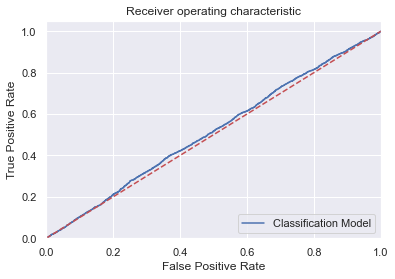

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  513  2190]
 [ 2536 11261]]
Outcome values : 
 513 2190 2536 11261
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.19      0.18      2703
           0       0.84      0.82      0.83     13797

    accuracy                           0.71     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.73      0.71      0.72     16500

Accuracy : 71.4 %
Precision : 16.8 %
Recall : 19.0 %
F1 Score : 0.178
Specificity or True Negative Rate : 81.6 %
Balanced Accuracy : 50.3 %
roc_auc_score: 0.503


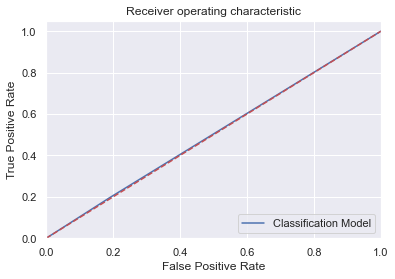

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[    0  2703]
 [    3 13794]]
Outcome values : 
 0 2703 3 13794
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


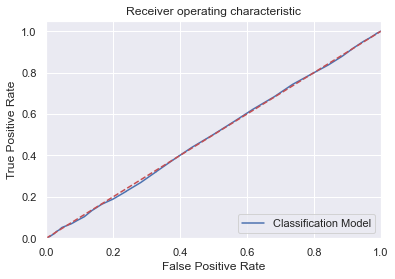

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[    2  2701]
 [   21 13776]]
Outcome values : 
 2 2701 21 13776
Classification report : 
               precision    recall  f1-score   support

           1       0.09      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.46      0.50      0.46     16500
weighted avg       0.71      0.84      0.76     16500

Accuracy : 83.5 %
Precision : 8.7 %
Recall : 0.1 %
F1 Score : 0.001
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.0 %
roc_auc_score: 0.5


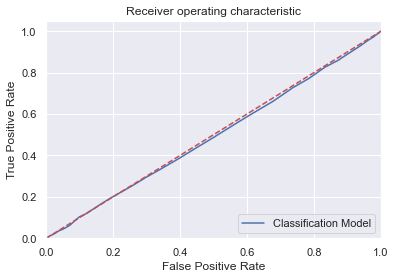

-----------------------------------------------------------------------------------------------------


In [49]:
# Build the Calssification models with Over Sampling and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()

# Evalution matrix for all the algorithm

MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    #from math import sqrt

    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    #print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, y_pred)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True Positive': tp,
               'False Negative': fn, 
               'False Positive': fp, 
               'True Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC': 'MCC',
               'ROC_AUC_Score':roc_auc_score(actual, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    Results = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [50]:
Results

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy,False Negative,False Positive,True Negative,True Positive
0,"(ExtraTreeClassifier(random_state=871194061), ...",NaN,NaN,NaN,NaN,0.835,0.087,0.001,0.001,0.998,MCC,0.499609,0.5,2701.0,21.0,13776.0,2.0


Model Name:  LogisticRegression()
Confusion matrix : 
 [[    0  2703]
 [    0 13797]]
Outcome values : 
 0 2703 0 13797
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


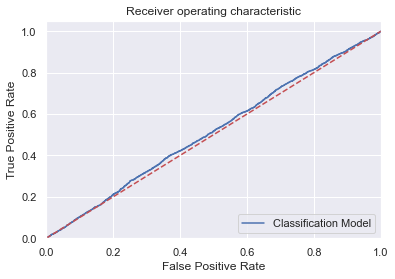

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[  510  2193]
 [ 2572 11225]]
Outcome values : 
 510 2193 2572 11225
Classification report : 
               precision    recall  f1-score   support

           1       0.17      0.19      0.18      2703
           0       0.84      0.81      0.82     13797

    accuracy                           0.71     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.73      0.71      0.72     16500

Accuracy : 71.1 %
Precision : 16.5 %
Recall : 18.9 %
F1 Score : 0.176
Specificity or True Negative Rate : 81.4 %
Balanced Accuracy : 50.1 %
MCC : 0.002
roc_auc_score: 0.501


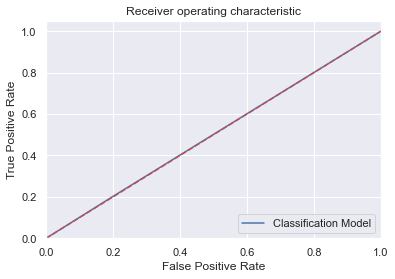

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[    0  2703]
 [    5 13792]]
Outcome values : 
 0 2703 5 13792
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.008
roc_auc_score: 0.5


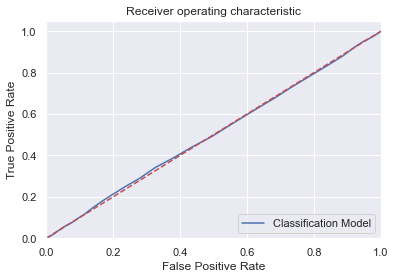

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[    5  2698]
 [   23 13774]]
Outcome values : 
 5 2698 23 13774
Classification report : 
               precision    recall  f1-score   support

           1       0.18      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.51      0.50      0.46     16500
weighted avg       0.73      0.84      0.76     16500

Accuracy : 83.5 %
Precision : 17.9 %
Recall : 0.2 %
F1 Score : 0.004
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 50.0 %
MCC : 0.002
roc_auc_score: 0.5


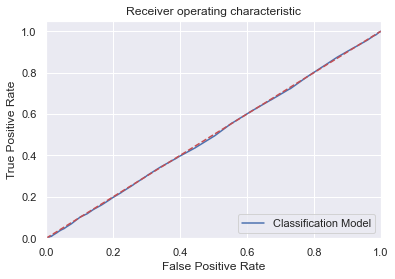

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[   85  2618]
 [  487 13310]]
Outcome values : 
 85 2618 487 13310
Classification report : 
               precision    recall  f1-score   support

           1       0.15      0.03      0.05      2703
           0       0.84      0.96      0.90     13797

    accuracy                           0.81     16500
   macro avg       0.49      0.50      0.47     16500
weighted avg       0.72      0.81      0.76     16500

Accuracy : 81.2 %
Precision : 14.9 %
Recall : 3.1 %
F1 Score : 0.052
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 49.8 %
MCC : -0.008
roc_auc_score: 0.498


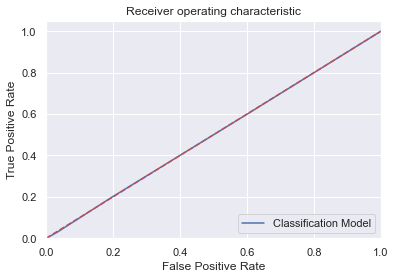

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(probability=True)
Confusion matrix : 
 [[    0  2703]
 [    0 13797]]
Outcome values : 
 0 2703 0 13797
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


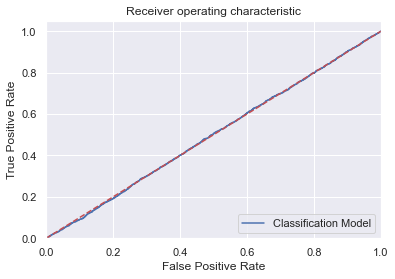

-----------------------------------------------------------------------------------------------------
Model Name:  BaggingClassifier(n_estimators=100)
Confusion matrix : 
 [[    0  2703]
 [    7 13790]]
Outcome values : 
 0 2703 7 13790
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 50.0 %
MCC : -0.009
roc_auc_score: 0.5


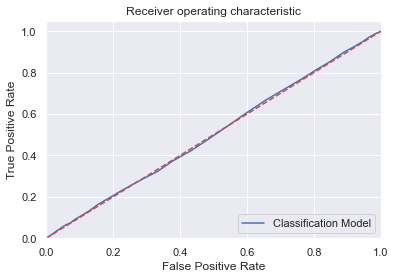

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[    0  2703]
 [    3 13794]]
Outcome values : 
 0 2703 3 13794
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.006
roc_auc_score: 0.5


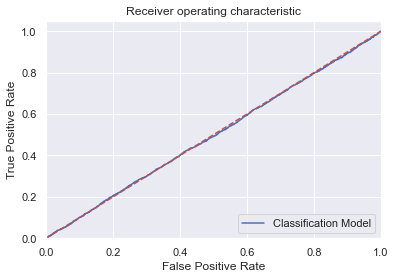

-----------------------------------------------------------------------------------------------------
Model Name:  LGBMClassifier()
Confusion matrix : 
 [[    0  2703]
 [    1 13796]]
Outcome values : 
 0 2703 1 13796
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : 0.0 %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : -0.003
roc_auc_score: 0.5


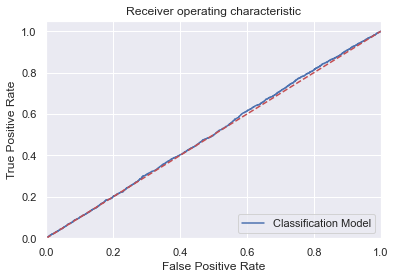

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[    0  2703]
 [    0 13797]]
Outcome values : 
 0 2703 0 13797
Classification report : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      2703
           0       0.84      1.00      0.91     13797

    accuracy                           0.84     16500
   macro avg       0.42      0.50      0.46     16500
weighted avg       0.70      0.84      0.76     16500

Accuracy : 83.6 %
Precision : nan %
Recall : 0.0 %
F1 Score : 0.0
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.0 %
MCC : nan
roc_auc_score: 0.5


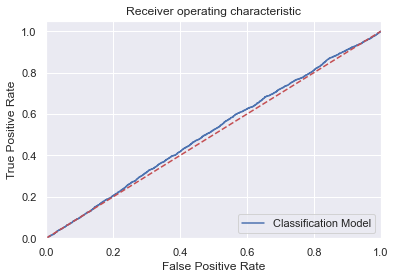

-----------------------------------------------------------------------------------------------------


In [51]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelSVM = SVC(probability=True)

modelBAG = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0,
                             bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB = GradientBoostingClassifier()
ModelLGB = lgb.LGBMClassifier()
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, modelBAG, ModelGB, ModelLGB, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [52]:
CSResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0,2703,0,13797,0.836,NaN,0.0,0.0,1.0,NaN,0.5,0.5
1,DecisionTreeClassifier(),510,2193,2572,11225,0.711,0.165,0.189,0.176,0.814,0.002,0.501131,0.501
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0,2703,5,13792,0.836,0.0,0.0,0.0,1.0,-0.008,0.499819,0.5
3,"(ExtraTreeClassifier(random_state=2028453149),...",5,2698,23,13774,0.835,0.179,0.002,0.004,0.998,0.002,0.500091,0.5
4,KNeighborsClassifier(),85,2618,487,13310,0.812,0.149,0.031,0.052,0.965,-0.008,0.498075,0.498
5,SVC(probability=True),0,2703,0,13797,0.836,NaN,0.0,0.0,1.0,NaN,0.5,0.5
6,(DecisionTreeClassifier(random_state=120524789...,0,2703,7,13790,0.836,0.0,0.0,0.0,0.999,-0.009,0.499746,0.5
7,([DecisionTreeRegressor(criterion='friedman_ms...,0,2703,3,13794,0.836,0.0,0.0,0.0,1.0,-0.006,0.499891,0.5
8,LGBMClassifier(),0,2703,1,13796,0.836,0.0,0.0,0.0,1.0,-0.003,0.499964,0.5
9,GaussianNB(),0,2703,0,13797,0.836,NaN,0.0,0.0,1.0,NaN,0.5,0.5


In [53]:
df1=appdata.drop(['first_open', 'user','enrolled_date'],axis=1)
df1.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


Text(0.5, 1.0, 'DF1 Heatmap correlatin matrix')

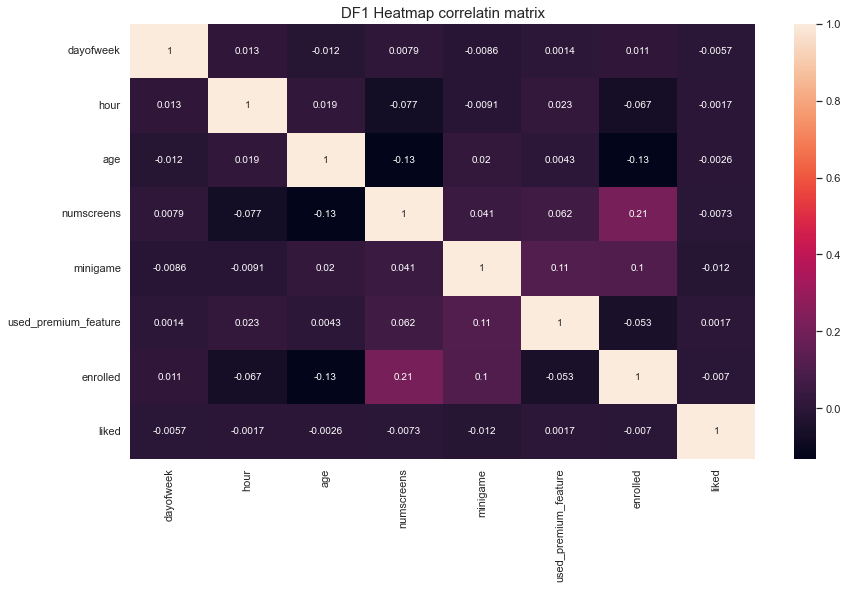

<AxesSubplot:xlabel='liked', ylabel='count'>

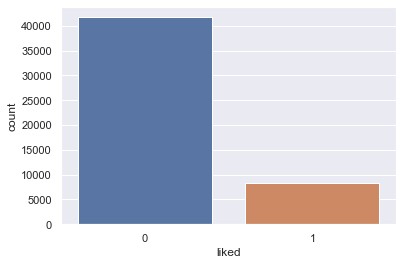

In [55]:
sns.countplot(df1.e)

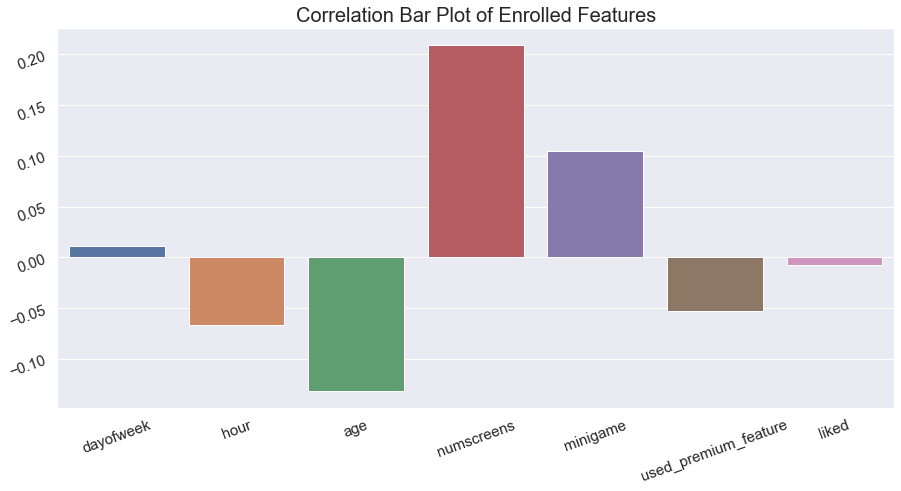

In [56]:
sns.set()
plt.figure(figsize=(15,7))
plt.title('Correlation Bar Plot of Enrolled Features', fontsize= 20)
df2 = df1.drop(['enrolled'], axis= 1)
axis = sns.barplot(df2.columns,df2.corrwith(df1.enrolled))
axis.tick_params(labelsize=15, labelrotation = 20)